In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from collections import Counter
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80, dpi_save=300, figsize=(4, 4))
%config InlineBackend.figure_format = 'retina'
import os
from scipy.io import mmread
from os.path import join, exists, split
from os import listdir
from typing import Union
import re
from scipy import stats
sc.settings.n_jobs=8
%matplotlib inline

In [2]:
import doubletdetection

In [3]:
import harmonypy

In [4]:
sap1 = sc.read_10x_mtx('D:/R/data/SAP1/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
sap2 = sc.read_10x_mtx('D:/R/data/SAP2/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
sap3 = sc.read_10x_mtx('D:/R/data/SAP3/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
sap4 = sc.read_10x_mtx('D:/R/data/SAP4/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
sap5 = sc.read_10x_mtx('D:/R/data/SAP5/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
sap6 = sc.read_10x_mtx('D:/R/data/SAP6/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
sap7 = sc.read_10x_mtx('D:/R/data/SAP7/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 

In [5]:
c1 = sc.read_10x_mtx('D:/R/data/C2/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
c2 = sc.read_10x_mtx('D:/R/data/C3/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
c3 = sc.read_10x_mtx('D:/R/data/C4/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
c4 = sc.read_10x_mtx('D:/R/data/C5/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
c5 = sc.read_10x_mtx('D:/R/data/C6/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 
c6 = sc.read_10x_mtx('D:/R/data/C7/filtered_feature_bc_matrix/',var_names='gene_symbols',cache=True) 

In [6]:
datasets = [sap1,sap2,sap3,sap4,sap5,sap6,sap7,c1,c2,c3,c4,c5,c6]

In [7]:
datasets

[AnnData object with n_obs × n_vars = 10768 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 7928 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 9303 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 8143 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 4539 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 8529 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 10594 × 36601
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 5346 × 33538
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 6118 × 33538
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 7966 × 33538
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 7999 × 36601
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 9263 × 36601
     var: 'gene_ids',
 An

In [8]:
for dataset in datasets:
    dataset.var_names_make_unique()
    sc.pp.filter_cells(dataset, min_genes=200)
    sc.pp.filter_genes(dataset, min_cells=3)

In [9]:
datasets

[AnnData object with n_obs × n_vars = 10398 × 23189
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 7885 × 23808
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 9284 × 23838
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 8126 × 23458
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 4462 × 22830
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 8451 × 23581
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 10530 × 24605
     obs: 'n_genes'
     var: 'gene_ids', 'feature_types', 'n_cells',
 AnnData object with n_obs × n_vars = 5301 × 18174
     obs: 'n_genes'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 6073 × 18

In [10]:
for dataset in datasets:
    clf = doubletdetection.BoostClassifier(
        n_iters=10,
        clustering_algorithm="louvain",
        standard_scaling=True,
        pseudocount=0.1,
        n_jobs=-1,
    )
    doublets = clf.fit(dataset.X).predict(p_thresh=1e-16, voter_thresh=0.5)
    doublet_score = clf.doublet_score()
    dataset.obs["doublet"] = doublets
    dataset.obs["doublet_score"] = doublet_score

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
samples = ['sap1','sap2','sap3','sap4','sap5','sap6','sap7','c1','c2','c3','c4','c5','c6']
i = -1
for dataset in datasets:
    new_index = []
    i += 1
    for name in dataset.obs.index:
        name = str(name) + '_' +  samples[i]
        new_index.append(name)
    dataset.obs.index = new_index

In [12]:
meta_doublets = pd.concat([sap1.obs,sap2.obs,sap3.obs,sap4.obs,sap5.obs,sap6.obs,sap7.obs,c1.obs,c2.obs,c3.obs,c4.obs,c5.obs,c6.obs])

In [13]:
meta_doublets

n_genes  doublet  doublet_score
AAACCCAAGTGAGTGC-1_sap1     1903      0.0   1.294559e-11
AAACCCACACAACGTT-1_sap1     3932      1.0   3.039177e+02
AAACCCACACAGCGCT-1_sap1     1537      0.0   6.345687e-09
AAACCCACACGACGCT-1_sap1     2995      0.0   2.898810e-07
AAACCCAGTAGATTAG-1_sap1      397      0.0   4.343544e-18
...                          ...      ...            ...
TTTGTCAGTTACCAGT-1_c6       1026      0.0   8.447604e-06
TTTGTCATCCAATGGT-1_c6        950      0.0   4.448748e-09
TTTGTCATCCATTCTA-1_c6        850      0.0   2.819817e-11
TTTGTCATCCTCTAGC-1_c6       1808      0.0   5.978743e+00
TTTGTCATCGAGAACG-1_c6       1627      0.0   1.558119e+00

[105361 rows x 3 columns]

In [14]:
meta_doublets.to_csv('D:/R/cell_doublets_info_8.14.csv')

In [79]:
integrated = sc.read_h5ad('../integrated_rm_batch.h5ad')

In [60]:
integrated.obs['doublet'] = [str(int(i)) for i in meta_doublets.loc[integrated.obs.index]['doublet'].to_list()]
integrated.obs['doublet_score'] = meta_doublets.loc[integrated.obs.index]['doublet_score']

In [61]:
integrated.obs

batch  n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGTGAGTGC-1_sap1  sap1     1856               1856        6139.0   
AAACCCACACAACGTT-1_sap1  sap1     3834               3834       15868.0   
AAACCCACACAGCGCT-1_sap1  sap1     1507               1507        6543.0   
AAACCCACACGACGCT-1_sap1  sap1     2922               2922       19476.0   
AAACCCAGTGGTTCTA-1_sap1  sap1     2358               2358       10792.0   
...                       ...      ...                ...           ...   
TTTGTTGGTCGAGATG-1_c4      c4     3029               3029       11489.0   
TTTGTTGGTGGAACAC-1_c4      c4     1046               1046        2064.0   
TTTGTTGGTTTACACG-1_c4      c4     1647               1647        3482.0   
TTTGTTGTCGCAAGAG-1_c4      c4     1287               1287        3163.0   
TTTGTTGTCGCGCTGA-1_c4      c4     4728               4728       22269.0   

                         total_counts_mt  pct_counts_mt condition leiden  \
AAACCCAAGTGAGTGC-1_sap1            238.0       3.876853       sap      0   
AAACCCACACAACGTT-1_sap1            419.0       2.640534       sap      9   
AAACCCACACAGCGCT-1_sap1            277.0       4.233532       sap      4   
AAACCCACACGACGCT-1_sap1            636.0       3.265558       sap      1   
AAACCCAGTGGTTCTA-1_sap1            392.0       3.632320       sap      4   
...                                  ...            ...       ...    ...   
TTTGTTGGTCGAGATG-1_c4              663.0       5.770737   control      7   
TTTGTTGGTGGAACAC-1_c4              310.0      15.019380   control      4   
TTTGTTGGTTTACACG-1_c4              120.0       3.446295   control      0   
TTTGTTGTCGCAAGAG-1_c4              141.0       4.457793   control      3   
TTTGTTGTCGCGCTGA-1_c4              878.0       3.942700   control     11   

                        doublet  doublet_score  
AAACCCAAGTGAGTGC-1_sap1       0   1.422534e-12  
AAACCCACACAACGTT-1_sap1       1   3.192633e+02  
AAACCCACACAGCGCT-1_sap1       0   1.755801e-07  
AAACCCACACGACGCT-1_sap1       0   2.875875e-04  
AAACCCAGTGGTTCTA-1_sap1       0   3.168693e-11  
...                         ...            ...  
TTTGTTGGTCGAGATG-1_c4         0   1.235458e+01  
TTTGTTGGTGGAACAC-1_c4         0   1.884557e-19  
TTTGTTGGTTTACACG-1_c4         0   6.303448e-01  
TTTGTTGTCGCAAGAG-1_c4         0   6.823563e-11  
TTTGTTGTCGCGCTGA-1_c4         0   2.865622e+00  

[70889 rows x 10 columns]

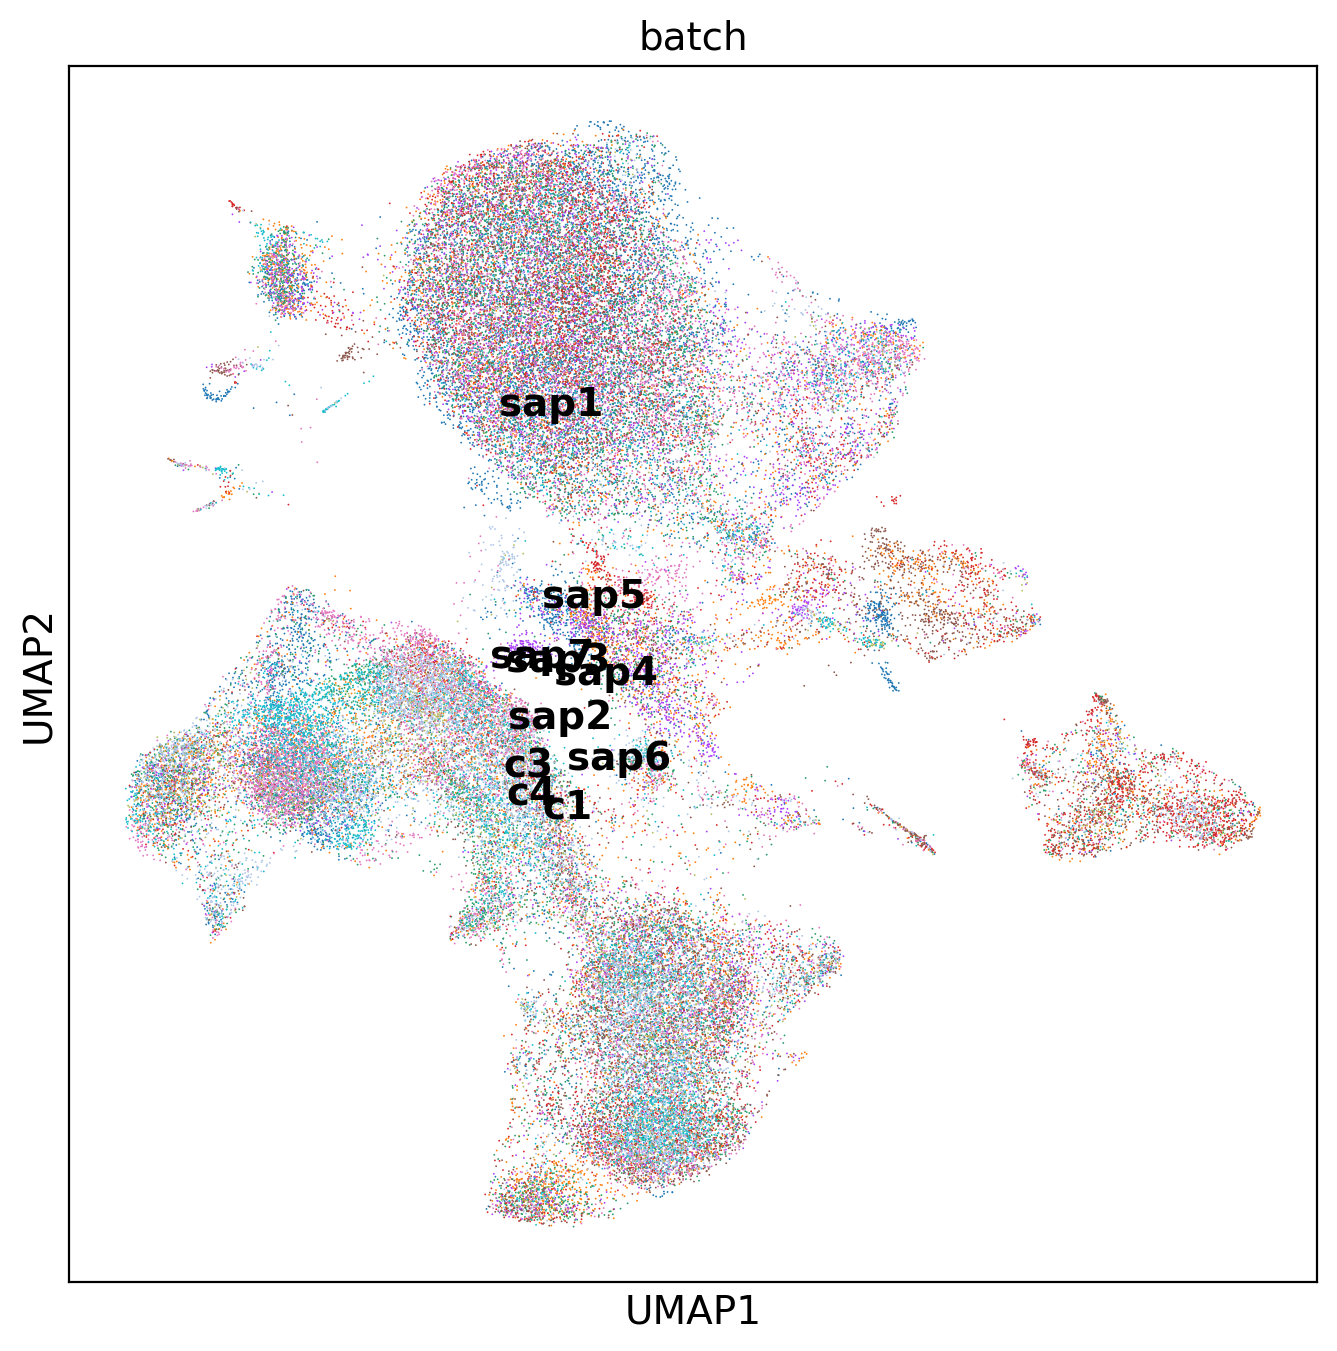

In [70]:
sc.settings.set_figure_params(dpi=100, figsize=(8, 8))
sc.pl.umap(integrated,color=['batch'],legend_loc='on data')

KeyError: 'FOXP3'

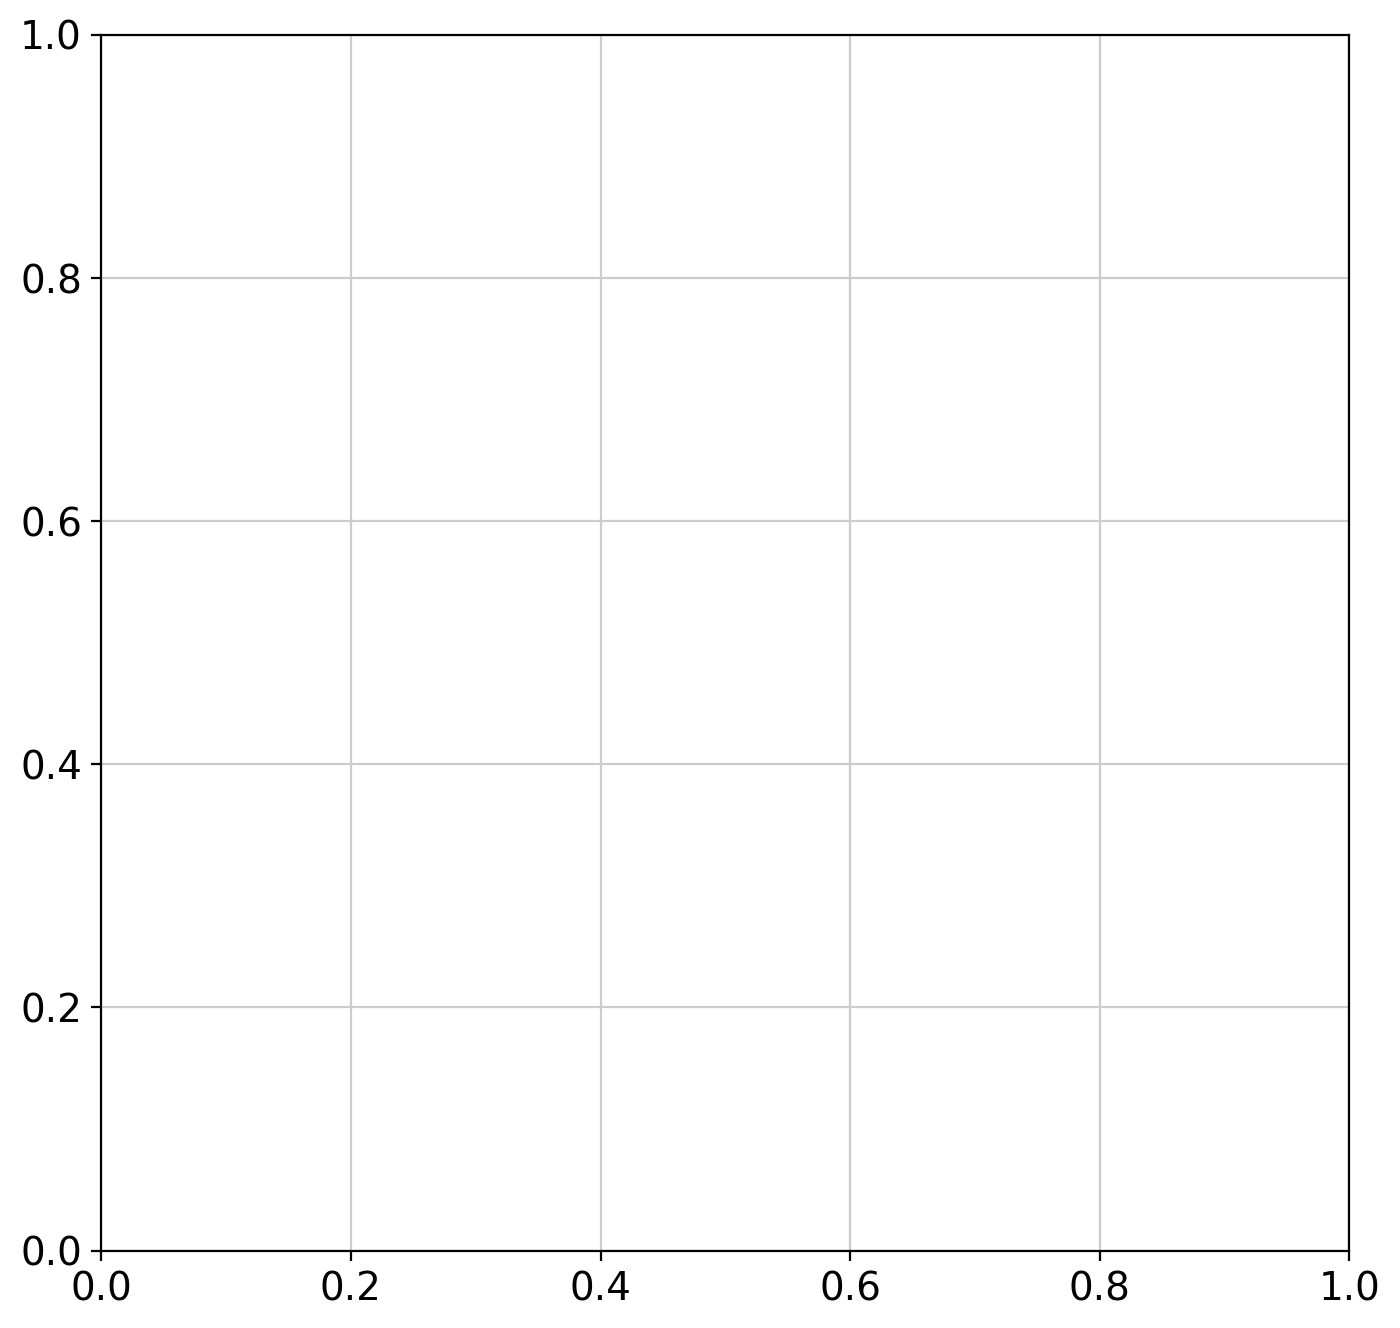

In [80]:
sc.settings.set_figure_params(dpi=100, figsize=(8, 8))
sc.pl.umap(integrated,color=['FOXP3'],legend_loc='on data')

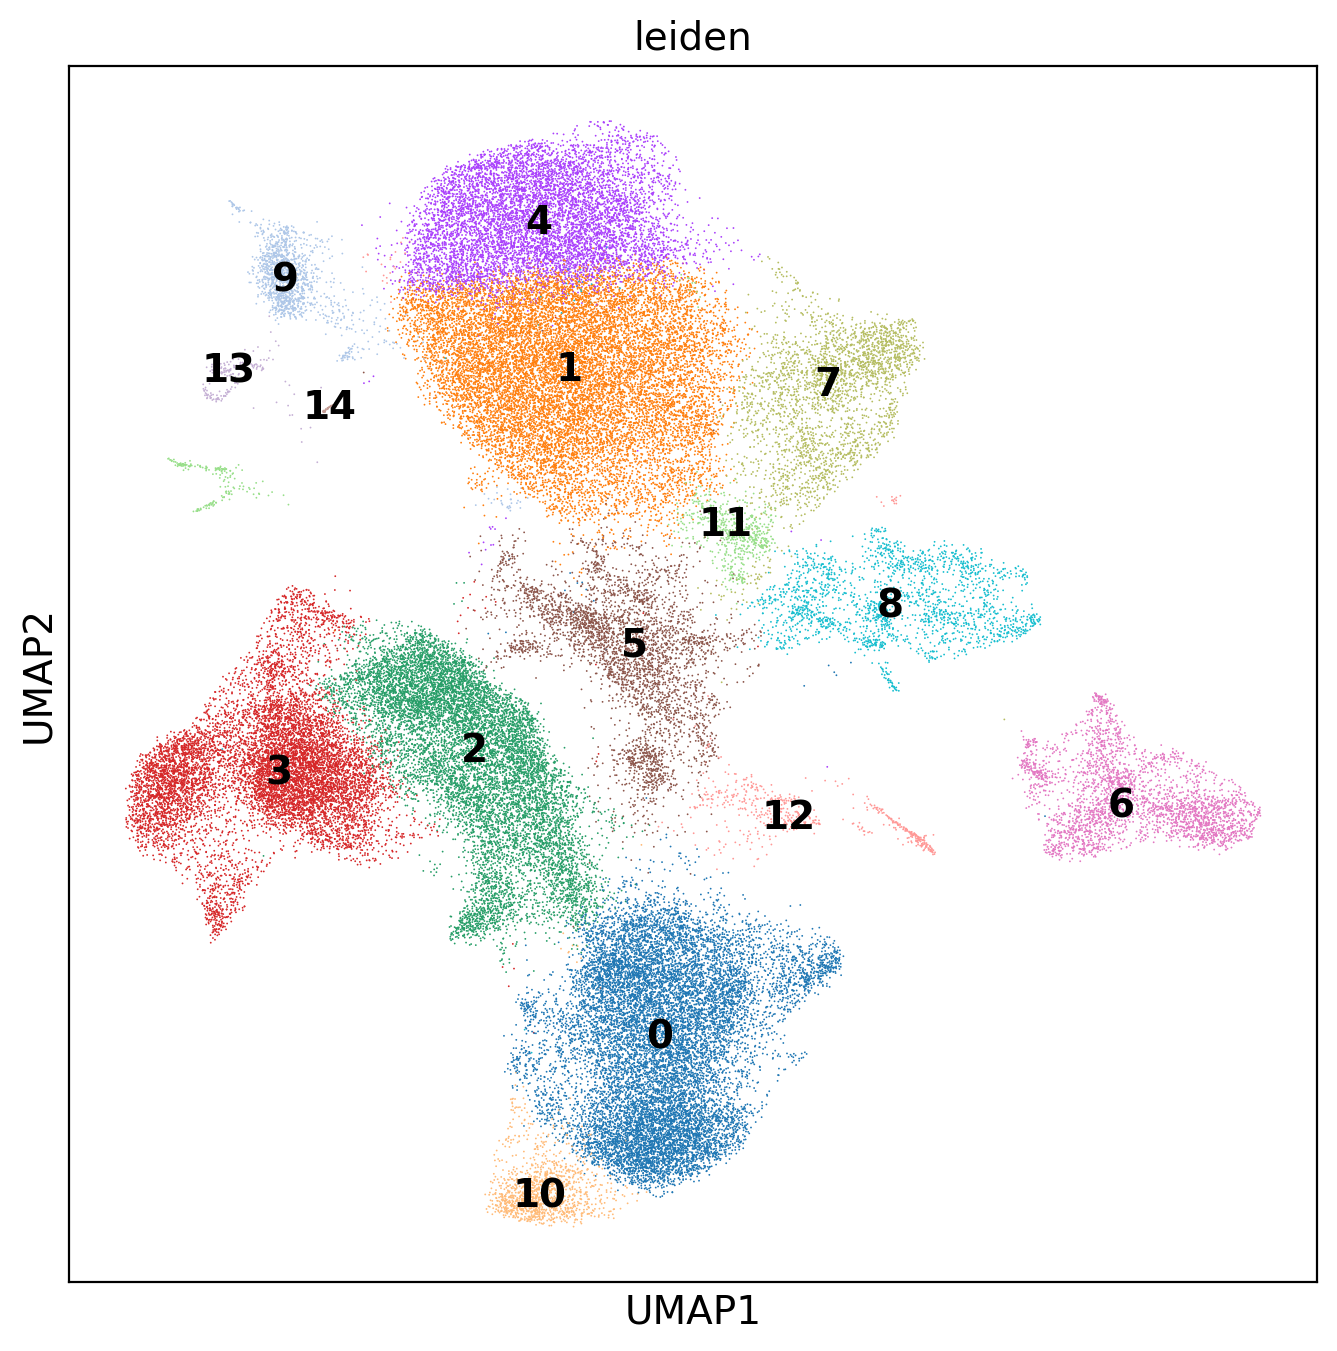

In [67]:
sc.settings.set_figure_params(dpi=100, figsize=(8, 8))
sc.pl.umap(integrated,color=['leiden'],legend_loc='on data')

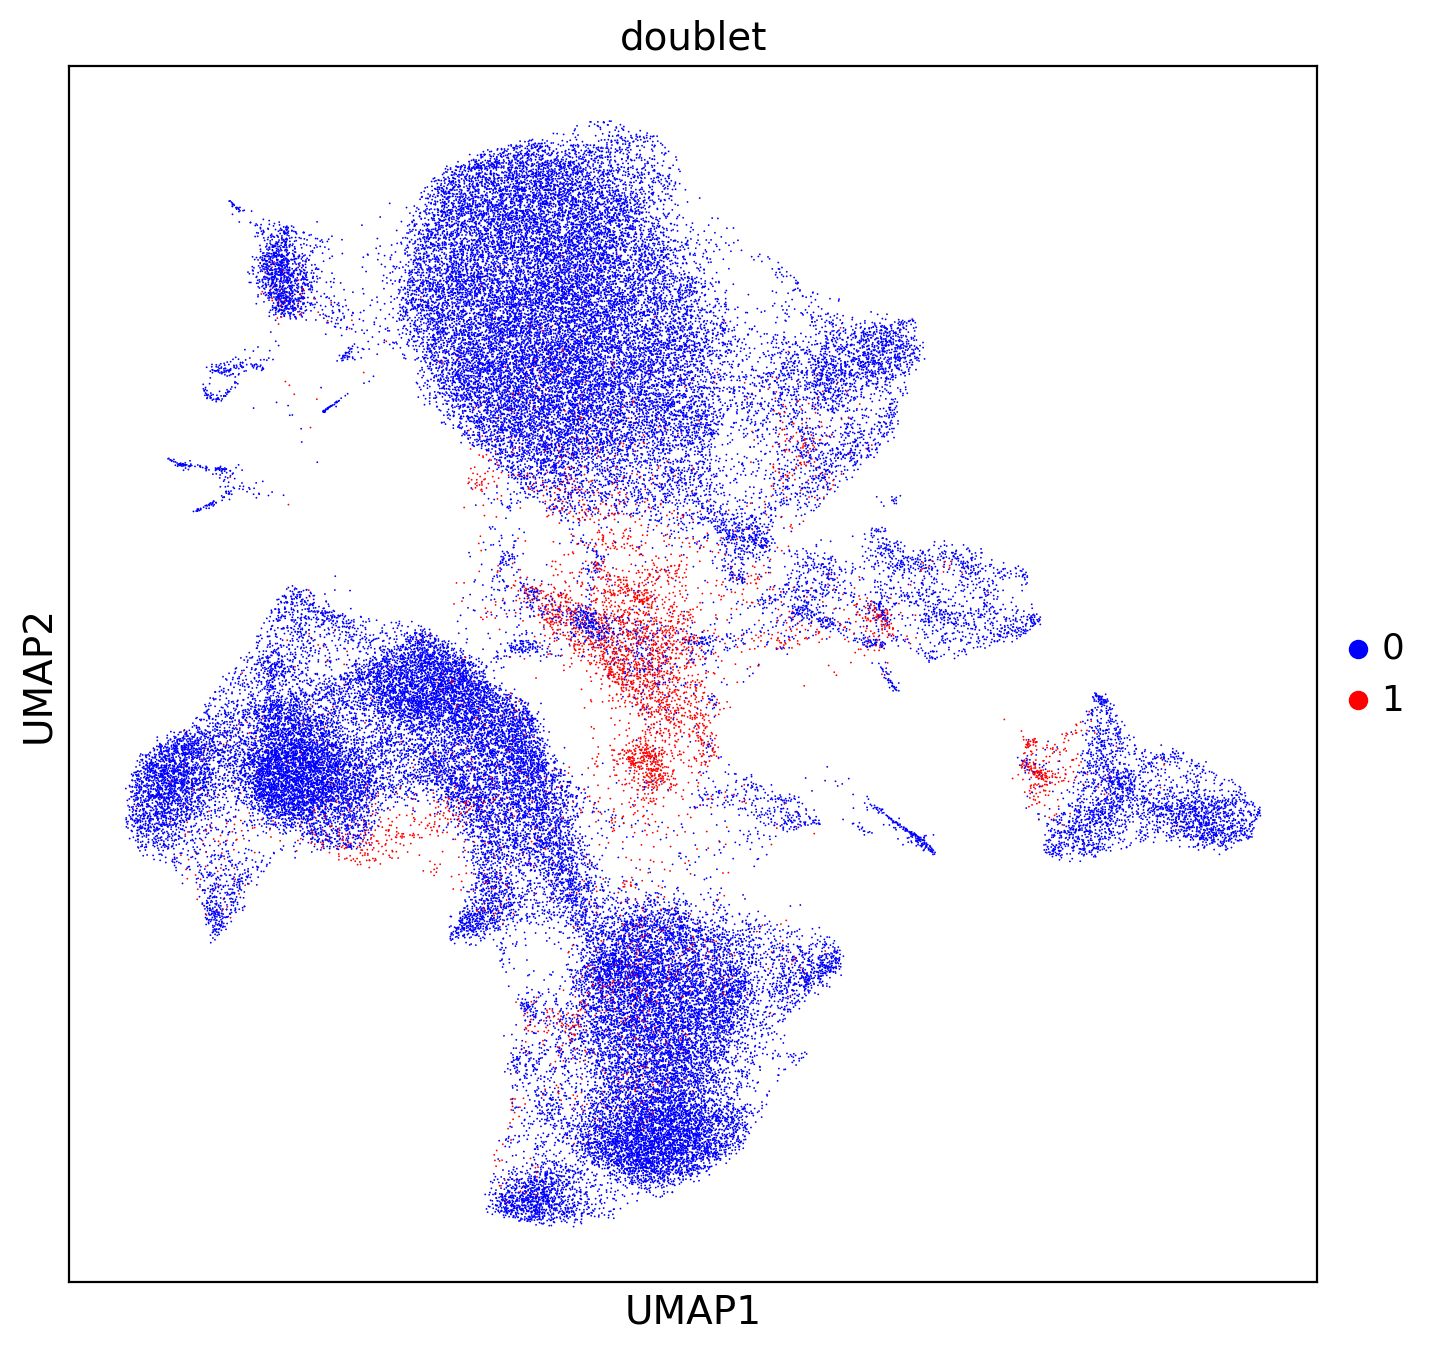

In [69]:
sc.settings.set_figure_params(dpi=100, figsize=(8, 8))
sc.pl.umap(integrated,color=['doublet'],palette=['blue','red'])

In [66]:
integrated.obs.doublet.value_counts()

0    65798
1     5091
Name: doublet, dtype: int64

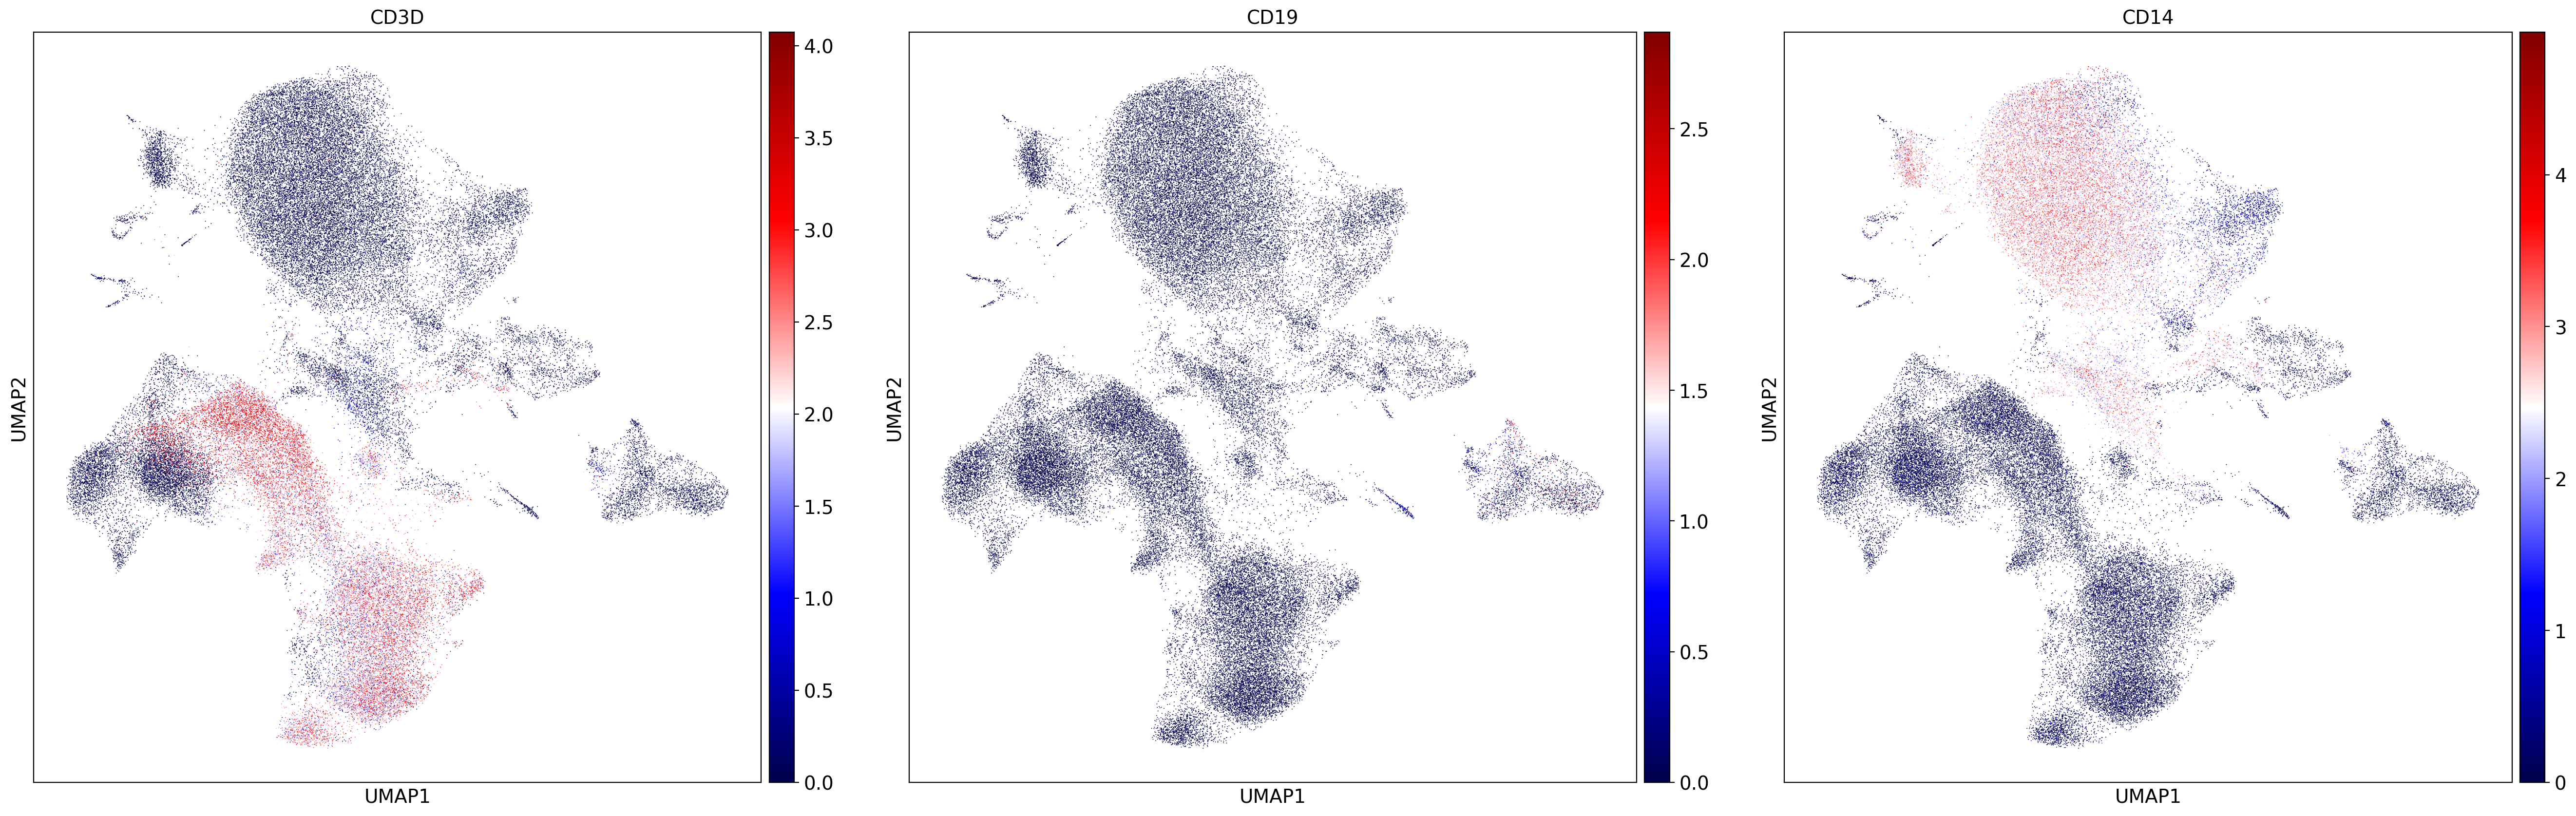

In [65]:
sc.settings.set_figure_params(dpi=100, figsize=(10, 10))
sc.pl.umap(integrated,color=['CD3D','CD19','CD14'],cmap='seismic')